# Setup

In [1]:
# Display env
sys = system("cat /etc/*release", intern=TRUE)
gsub("PRETTY_NAME=","", grep("PRETTY_NAME", sys, value=TRUE))
cat(R.version$version.string,"\n")
# Use pre-compiled R packages for Linux (faster install)
options(repos=list(CRAN='https://packagemanager.posit.co/cran/__linux__/jammy/latest/'))

[1] "\"Ubuntu 24.04 LTS\""

R version 4.3.3 (2024-02-29) 


In [2]:
# Pre-compiled rlibkriging package (faster install)
remotes::install_url("https://github.com/libKriging/rlibkriging/releases/download/0.8-0.1/rlibkriging_0.8-0_R_x86_64-pc-linux-gnu.tar.gz", dependencies = TRUE, build=FALSE)
# for Windows: remotes::install_url("https://github.com/libKriging/rlibkriging/releases/download/0.8-0.1/rlibkriging_0.8-0.zip", dependencies = TRUE, build=FALSE)
# for OSX(intel): remotes::install_url("https://github.com/libKriging/rlibkriging/releases/download/0.8-0.1/rlibkriging_0.8-0.tgz", dependencies = TRUE, build=FALSE)

library(rlibkriging)

# 2D/3D Plot functions
install.packages('DiceView')
library(DiceView)

Installation du package dans ‘/home/richet/R/x86_64-pc-linux-gnu-library/4.3’
(car ‘lib’ n'est pas spécifié)


Attachement du package : ‘rlibkriging’


Les objets suivants sont masqués depuis ‘package:base’:

    load, save


Installation du package dans ‘/home/richet/R/x86_64-pc-linux-gnu-library/4.3’
(car ‘lib’ n'est pas spécifié)



# Basics

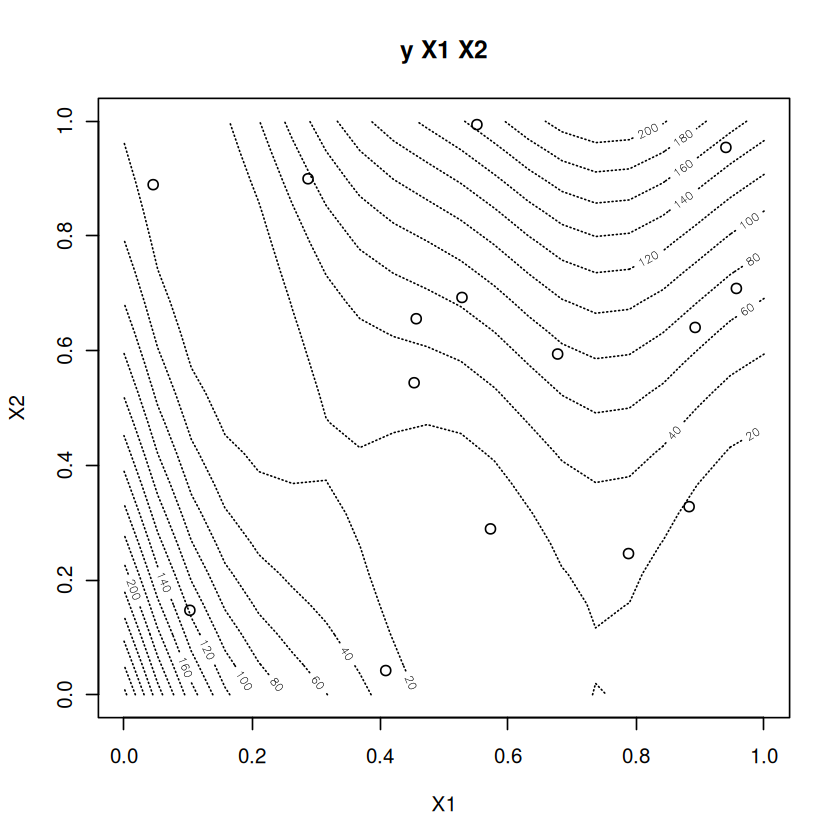

In [3]:
# 2D (Branin) function, small design
set.seed(123)
X <- cbind(runif(15),runif(15))
f <- function(x) {
  if (!is.matrix(x)) x = matrix(x,nrow=1)
  x1 <- x[,1] * 15 - 5
  x2 <- x[,2] * 15
  (x2 - 5/(4 * pi^2) * (x1^2) + 5/pi * x1 - 6)^2 + 10 * (1 - 1/(8 * pi)) * cos(x1) + 10
}
y <- f(X) # + 10*rnorm(nrow(X))

contourview(f, dim=2, col_surf = 'black', nlevels=21)
points(X)

In [4]:
# Build Kriging (https://libkriging.readthedocs.io/en/latest/math/KrigingModels.html)
k <- Kriging(y, X, kernel="gauss", optim = "BFGS10") #, objective = "LL", optim = "BFGS", regmodel = "constant", parameters = ...)
# For details, see:
# * kernel: https://libkriging.readthedocs.io/en/latest/math/kernel.html
# * regmodel: https://libkriging.readthedocs.io/en/latest/math/trend.html
# * parameters: https://libkriging.readthedocs.io/en/latest/math/parameters.html
print(k)

* data: 15x[0.0455565,0.956833],[0.0420595,0.99427] -> 15x[7.19385,163.432]
* trend constant (est.): 92.5084
* variance (est.): 5652.77
* covariance:
  * kernel: gauss
  * range (est.): 0.232625, 0.522983
  * fit:
    * objective: LL
    * optim: BFGS10


# Sample

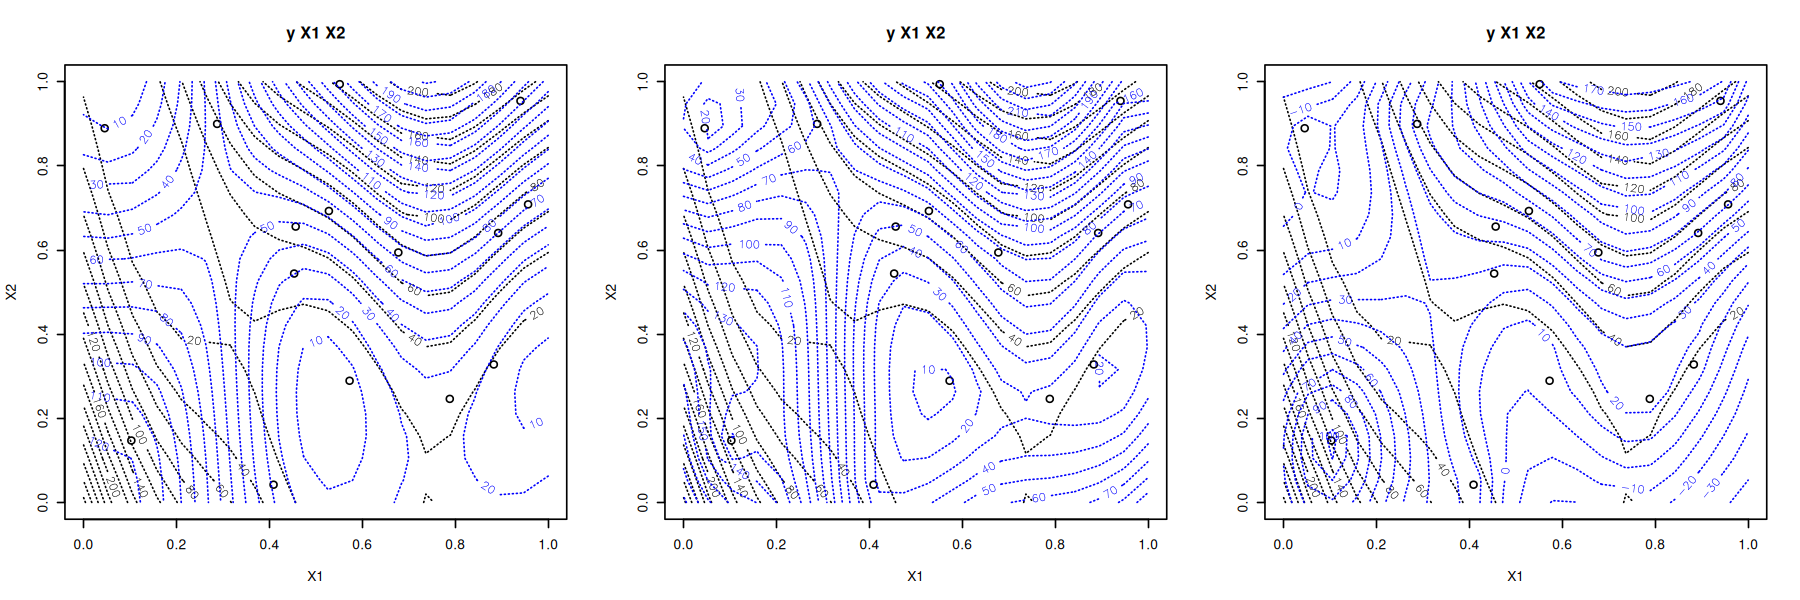

In [5]:
# Predict
#.x <- as.matrix(seq(0, 1, , 11))
#.xx = as.matrix(expand.grid(.x,.x))
#p.xx <- predict(k, .xx, TRUE, FALSE)

par(mfrow=c(1,3))
options(repr.plot.width=15, repr.plot.height=5)

contourview(f, dim=2, col_surf = 'black', nlevels=21)
points(X)
contourview(function(.xx) predict(k,.xx,TRUE,FALSE)$mean, dim=2, col_surf = 'blue', nlevels=21, add=TRUE)

contourview(f, dim=2, col_surf = 'black', nlevels=21)
points(X)
contourview(function(.xx) {p.xx=predict(k,.xx,TRUE,FALSE); p.xx$mean + 2*p.xx$stdev}, dim=2, col_surf = 'blue', nlevels=21, add=TRUE)

contourview(f, dim=2, col_surf = 'black', nlevels=21)
points(X)
contourview(function(.xx) {p.xx=predict(k,.xx,TRUE,FALSE); p.xx$mean - 2*p.xx$stdev}, dim=2, col_surf = 'blue', nlevels=21, add=TRUE)

options(repr.plot.width=7, repr.plot.height=7)

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"size" n'est pas un paramètre graphique”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"zlim" n'est pas un paramètre graphique”


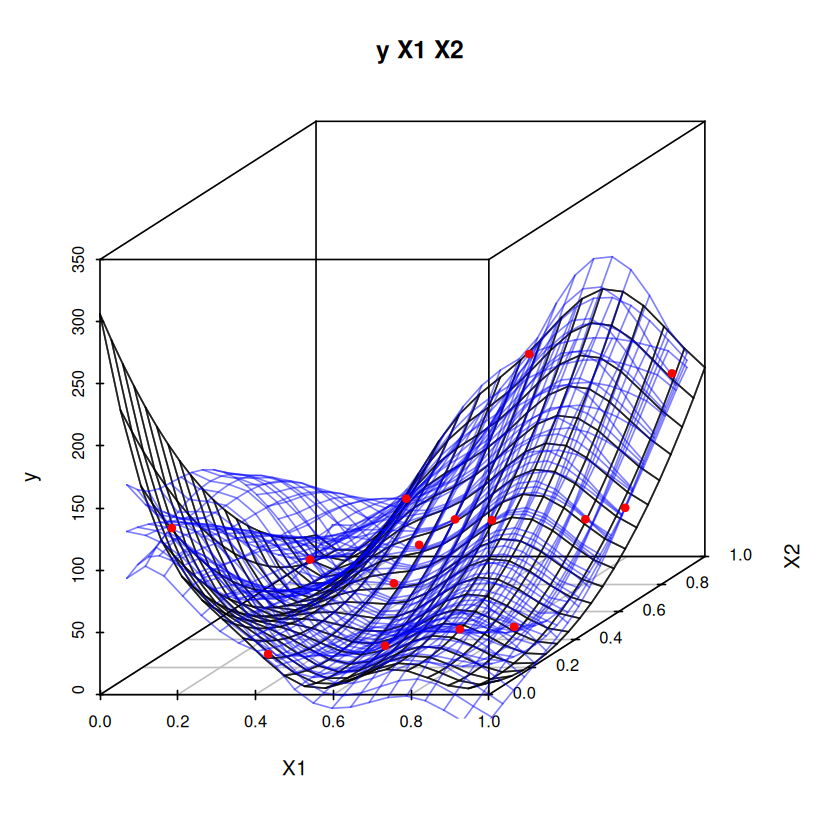

In [6]:
sectionview3d(f, dim=2, col_surf = 'black', engine3d = "scatterplot3d")
sectionview3d(k, add=TRUE)

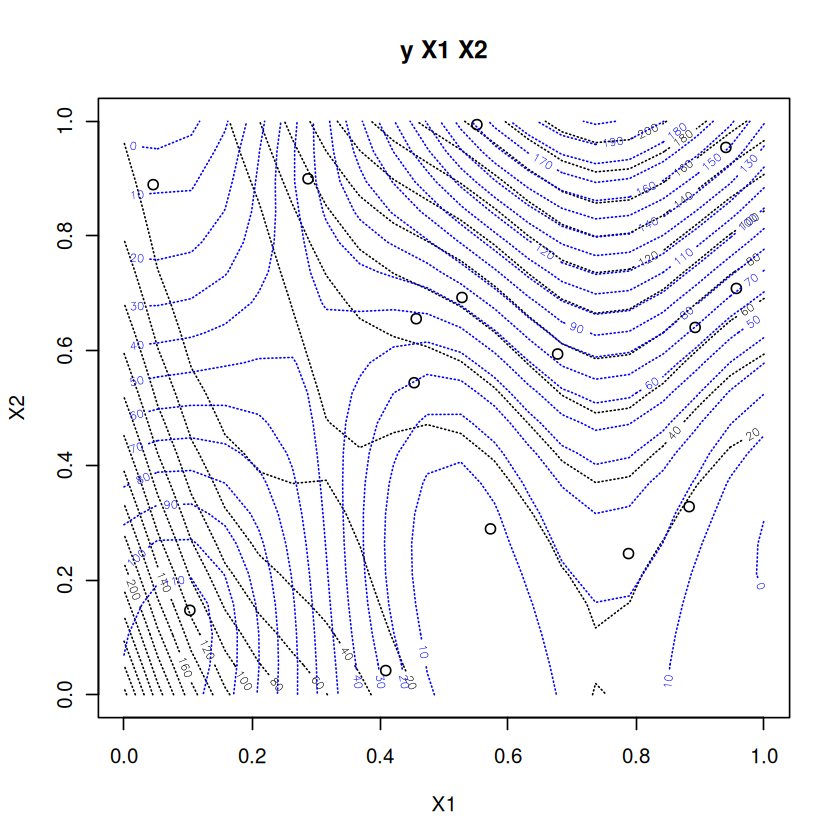

In [7]:
# Simulate
#s.xx <- simulate(k, nsim = 1, seed = 123, x=.xx)

contourview(f, dim=2, col_surf = 'black', nlevels=21)
points(X)

contourview(function(.xx) simulate(k,nsim=1,seed=123, .xx), dim=2, col_surf = 'blue', nlevels=21, add=TRUE)

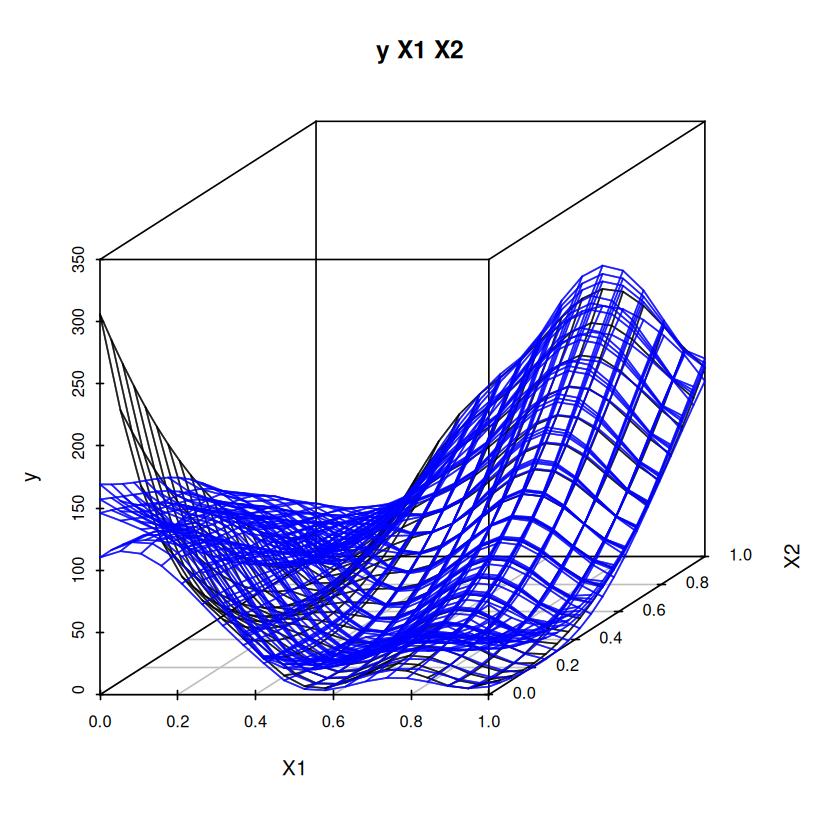

In [8]:
sectionview3d(f, dim=2, col_surf = 'black', engine3d = "scatterplot3d")
sectionview3d(function(.xx) simulate(k,nsim=1,seed=123, .xx), dim=2, add=TRUE)
sectionview3d(function(.xx) simulate(k,nsim=1,seed=1234, .xx), dim=2, add=TRUE)
sectionview3d(function(.xx) simulate(k,nsim=1,seed=12345, .xx), dim=2, add=TRUE)
sectionview3d(function(.xx) simulate(k,nsim=1,seed=123456, .xx), dim=2, add=TRUE)

# Fit

[1] -71.15569


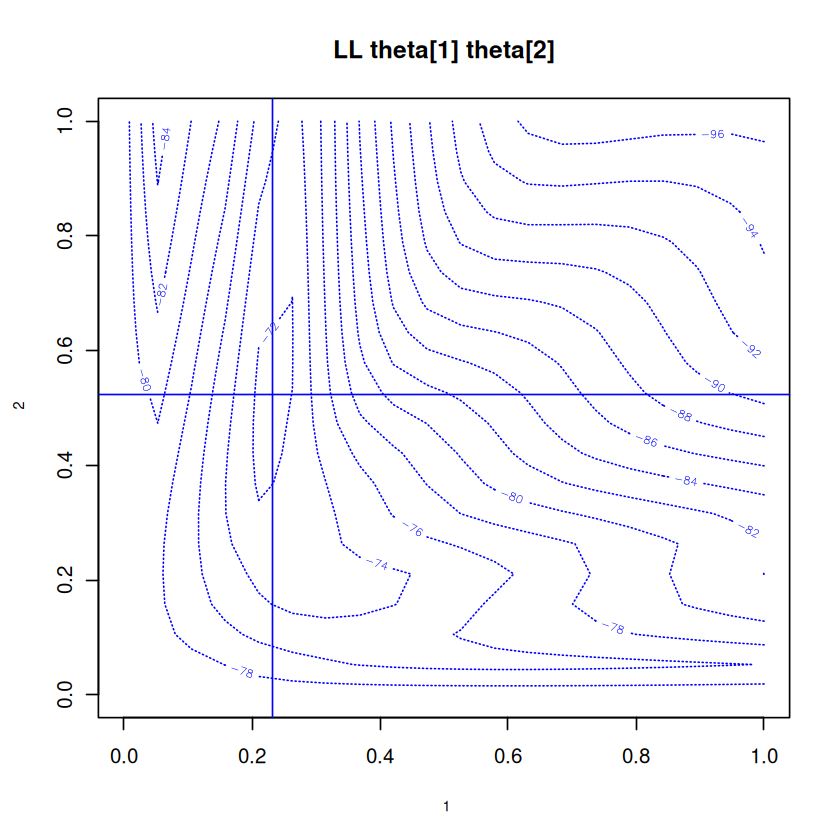

In [9]:
# log-Likelihood (https://libkriging.readthedocs.io/en/latest/math/likelihood.html)
print(k$logLikelihood())

contourview( function(t) k$logLikelihoodFun(t)$logLikelihood , dim=2 , Xlab=c(expression(theta[1]),expression(theta[2])), ylab="LL")
abline(v=k$theta()[1],col='blue')
abline(h=k$theta()[2],col='blue')

[1] 374.5819


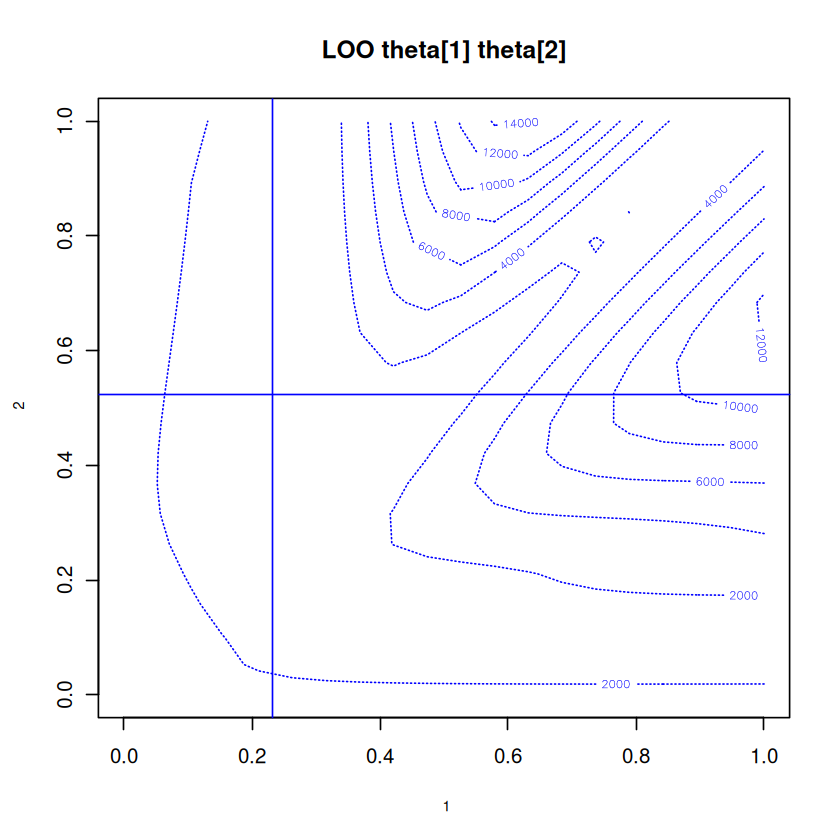

In [10]:
# leave-one-out (https://libkriging.readthedocs.io/en/latest/math/leaveOneOut.html)
print(k$leaveOneOut())

contourview( function(t) k$leaveOneOutFun(t)$leaveOneOut , dim=2 , Xlab=c(expression(theta[1]),expression(theta[2])), ylab="LOO")
abline(v=k$theta()[1],col='blue')
abline(h=k$theta()[2],col='blue')

[1] -60.28653


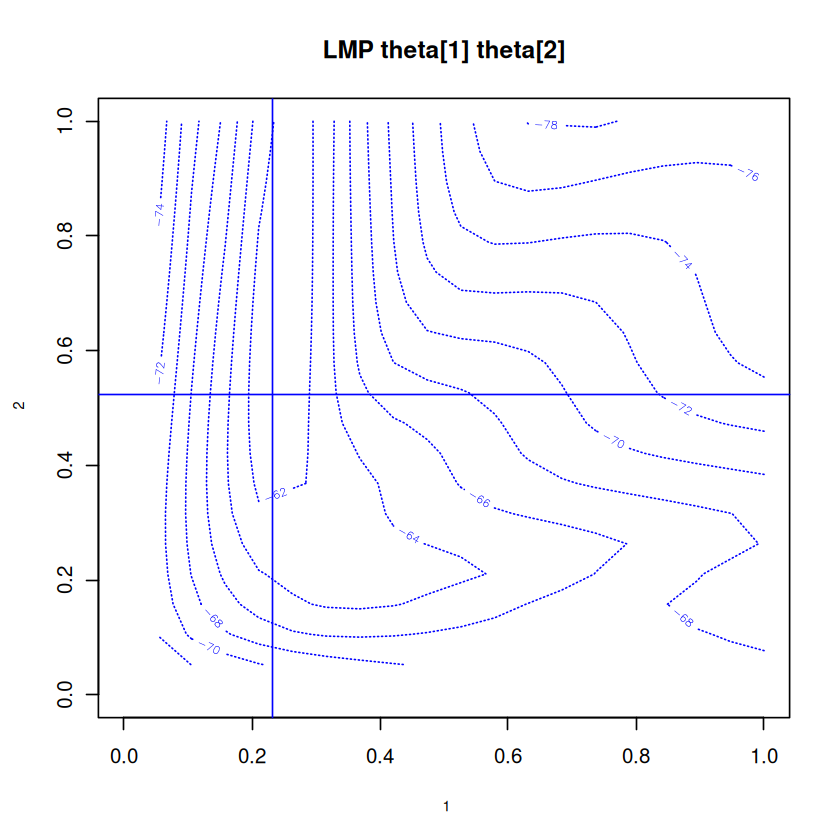

In [11]:
# log-marginal-posterior (https://libkriging.readthedocs.io/en/latest/math/Bayesian.html)
print(k$logMargPost())

contourview( function(t) k$logMargPostFun(t)$logMargPost , dim=2 , Xlab=c(expression(theta[1]),expression(theta[2])), ylab="LMP")
abline(v=k$theta()[1],col='blue')
abline(h=k$theta()[2],col='blue')